### Analysis of customer reviews for Titan men watches scraped from Amazon website

In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

In [2]:
data=pd.read_csv('Scraped reviews.csv')

In [3]:
data.head()

,reviews
0,Good\n
1,"Classic leather..Glossy gold dial.. awesome finishing!! Product is tooo goood and eye catching! Gifted it to my father, father in law and my father’s elder brother .. they loved it to the core! Highly recommended if this is a gift to elders 😍😍😍\n"
2,"Good..bt last day of every month showing incorrect date (30,31)\n"
3,I like the day & date system of this watch . But the leather belt of this watch is not sogood . The belt should have been more soft .\n
4,a very good product. it might give a small itch for your skin whr the back of the dial is in touch with the hand but otherwise fine. the color is very golden and looks much better than in the picture given. totally awesome product.\n


In [4]:
df=data.copy() # Creating a copy of the original data

### Review cleaning

All the reviews have '\n' at the end. Let's remove it.

In [5]:
df['reviews']=df['reviews'].apply(lambda x:x.strip('\n')) # To remove '\n' from every review

In [6]:
df.head()

,reviews
0,Good
1,"Classic leather..Glossy gold dial.. awesome finishing!! Product is tooo goood and eye catching! Gifted it to my father, father in law and my father’s elder brother .. they loved it to the core! Highly recommended if this is a gift to elders 😍😍😍"
2,"Good..bt last day of every month showing incorrect date (30,31)"
3,I like the day & date system of this watch . But the leather belt of this watch is not sogood . The belt should have been more soft .
4,a very good product. it might give a small itch for your skin whr the back of the dial is in touch with the hand but otherwise fine. the color is very golden and looks much better than in the picture given. totally awesome product.


In [7]:
import string
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer

In [8]:
STOPWORDS=stopwords.words("english") #stopwords are the most common unnecessary words. eg is, he, that, etc.

In [9]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii') # A function to remove emojis from the reviews

In [10]:
import string   
import re

def clean_text(text):
    ps=PorterStemmer()
    
    text=deEmojify(text) # remove emojis
    text_cleaned="".join([x for x in text if x not in string.punctuation]) # remove punctuation
    
    text_cleaned=re.sub(' +', ' ', text_cleaned) # remove extra white spaces
    text_cleaned=text_cleaned.lower() # converting to lowercase
    tokens=text_cleaned.split(" ")
    tokens=[token for token in tokens if token not in STOPWORDS] # Taking only those words which are not stopwords
    text_cleaned=" ".join([ps.stem(token) for token in tokens])
    
    
    return text_cleaned

In [11]:
df['cleaned_reviews']=df['reviews'].apply(lambda x:clean_text(x))

In [12]:
df.sample(5)

,reviews,cleaned_reviews
4740,"The second is not working,poor quality of check before dispatch and it was a gift for my dad. Just pathetic services",second workingpoor qualiti check dispatch gift dad pathet servic
844,Chain size,chain size
1613,I just loved this product,love product
4646,"As seen in photo..no damage, good packing",seen photono damag good pack
3365,Too good,good


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Generating a wordcloud to give a view of the words in the reviews based on their frequency of occurence 

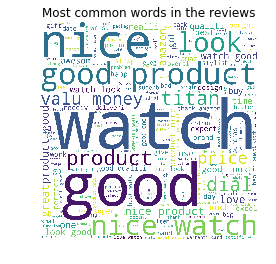

In [14]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='white')
wordcloud = wordcloud.generate(' '.join(df['cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()

### Analyzing the sentiment of reviews using the library 'vader'

In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

Defining a function to find the sentiment of a review. It will return a dictionary having positive, negative and compound scores.

In [16]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

Defining a function to extract only the compound score.

In [17]:
def compound_score(text):
    comp=sentiment_analyzer_scores(text)
    return comp['compound'] # returns the compound score from the dictionary

In [18]:
df['sentiment_score']=df['reviews'].apply(lambda x:compound_score(x)) # applying on the reviews column to get the score

In [19]:
df.sample(5)

,reviews,cleaned_reviews,sentiment_score
5992,The watch looks really good but thing to note is the belt is brownish black in colour not exactly black as shown in the picture.,watch look realli good thing note belt brownish black colour exactli black shown pictur,0.2724
1350,It's a fantastic watch. Just praiseworthy.,fantast watch praiseworthi,0.8020
4903,Great nice good,great nice good,0.8689
3536,Nice,nice,0.4215
2373,the best watch,best watch,0.6369


We have got the sentiment score. Now categorizing the reviews based on the score into postive, negative and neutral using the below conditions.

In [20]:
def sentiment_category(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

In [21]:
df['review_category']=df['sentiment_score'].apply(lambda x:sentiment_category(x))

In [22]:
df.sample(5)

,reviews,cleaned_reviews,sentiment_score,review_category
916,Super,super,0.5994,positive
461,To be honest not a fan of this watch because its not what i think before ordering the dial is very long so if you have a small wrist its not very good looking. The locking mechanism is also very irriting and will become loose with time. Or maybe its not for me?,honest fan watch think order dial long small wrist good look lock mechan also irrit becom loos time mayb,-0.3787,negative
1410,Awseome,awseom,0.0000,neutral
5682,Value for money,valu money,0.3400,positive
2819,I gifted this to my father and he loved it.It's good for daily wear.,gift father love itit good daili wear,0.7783,positive


#### Plotting a distribution of the review categories

Text(0.5, 1.0, 'Distribution of Reviews Category')

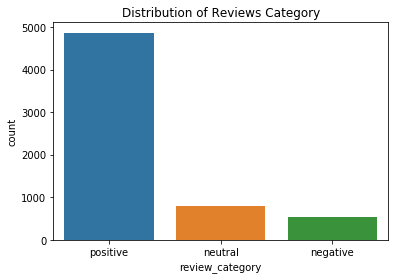

In [23]:
sns.countplot(df['review_category']).set_title("Distribution of Reviews Category")

In [24]:
positive_reviews=df.loc[df['review_category']=='positive','cleaned_reviews'].tolist() # extracting all positive reviews and converting to a list
positive_reviews[0:5]

['good',
 'classic leatherglossi gold dial awesom finish product tooo goood eye catch gift father father law father elder brother love core highli recommend gift elder ',
 'like day date system watch leather belt watch sogood belt soft ',
 'good product might give small itch skin whr back dial touch hand otherwis fine color golden look much better pictur given total awesom product',
 'gem father wrist year seen moder use lot water lash titan survivor father love ithad chang leather strap due excess use avail cheap worth valu ']

In [25]:
negative_reviews=df.loc[df['review_category']=='negative','cleaned_reviews'].tolist() # extracting all negative reviews and converting to a list
negative_reviews[0:5]

['titen watch good ladher belt qualiti poor length short ladher belt crack 5 month',
 'paid 1500 found later avail 500 rupe snapdeal moreov date doesnt work accur that huge disadvantag dont buy watch',
 'titen watch good ladher belt qualiti poor length short ladher belt crack 5 month',
 'paid 1500 found later avail 500 rupe snapdeal moreov date doesnt work accur that huge disadvantag dont buy watch',
 'watch receiv work condit belt also damag overal felt qualiti poor compar price ask refund recommend']

#### Generating wordclouds separately for positive and negative reviews

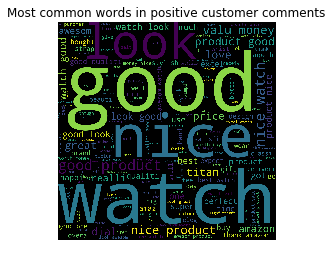

In [26]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(df.loc[df['review_category']=='positive','cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in positive customer comments")
plt.axis('off')
plt.show()

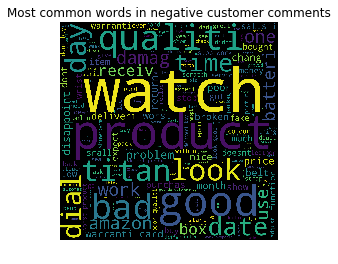

In [27]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(df.loc[df['review_category']=='negative','cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in negative customer comments")
plt.axis('off')
plt.show()

### Unigrams

Unigrams are just individual words

In [28]:
from collections import Counter

Defining a function to get the most common words

In [29]:
def getMostCommon(reviews_list,topn=20):
    reviews=" ".join(reviews_list)
    tokenised_reviews=reviews.split(" ")
    
    
    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(topn) # return words with the highest frequencies

In [30]:
top_20_positive_review_words=getMostCommon(positive_reviews,20)

In [31]:
top_20_positive_review_words

[('good', 1894),
 ('watch', 1713),
 ('product', 1269),
 ('nice', 1174),
 ('look', 976),
 ('like', 397),
 ('love', 331),
 ('money', 311),
 ('price', 311),
 ('awesom', 304),
 ('amazon', 298),
 ('qualiti', 293),
 ('valu', 267),
 ('dial', 260),
 ('great', 254),
 ('best', 238),
 ('gift', 236),
 ('titan', 230),
 ('one', 228),
 ('', 211)]

In [32]:
top_20_negative_review_words=getMostCommon(negative_reviews,20)

In [33]:
top_20_negative_review_words

[('watch', 236),
 ('product', 162),
 ('good', 117),
 ('qualiti', 81),
 ('bad', 66),
 ('work', 61),
 ('look', 61),
 ('titan', 50),
 ('time', 48),
 ('day', 46),
 ('dial', 42),
 ('date', 40),
 ('warranti', 37),
 ('damag', 36),
 ('amazon', 35),
 ('poor', 34),
 ('problem', 34),
 ('use', 34),
 ('one', 34),
 ('batteri', 32)]

Defining a function to produce a barplot of the most common words

In [34]:
def plotMostCommonWords(reviews_list,topn=20,title="Common Review Words",color="blue",axis=None): #default number of words is given as 20
    top_words=getMostCommon(reviews_list,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

Using the above function, to produce barplots for positive and negative reviews separately

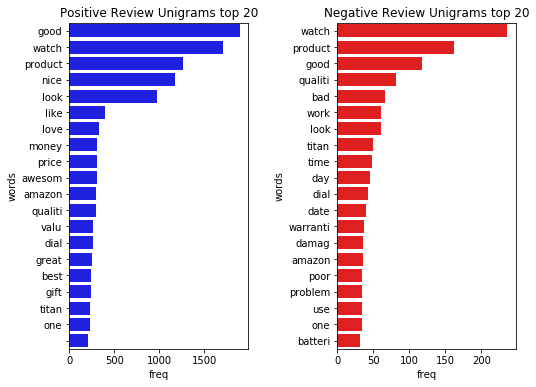

In [35]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 8,6 ## Sets the heigth and width of image


fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5) #Adjusts the space between the two plots
plotMostCommonWords(positive_reviews,20,"Positive Review Unigrams",axis=ax[0])

plotMostCommonWords(negative_reviews,20,"Negative Review Unigrams",color="red",axis=ax[1])


#### A unigram will not give us a clear understanding as to what is the customer trying to tell. Hence, we use bigrams.

### Bigrams

Bigrams are a combination of 2 words

Defining a function to create n-grams. It can be a combination of 2,3,4 or more words. This number can be given as an input to the function argument.

In [36]:
def generateNGram(text,n):
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

Creating bigrams for postive and negative reviews separately.

In [37]:
positive_reviews_bigrams=[" ".join(generateNGram(review,2)) for review in positive_reviews]
negative_reviews_bigrams=[" ".join(generateNGram(review,2)) for review in negative_reviews]

In [38]:
positive_reviews_bigrams[:5]

['',
 'classic_leatherglossi leatherglossi_gold gold_dial dial_awesom awesom_finish finish_product product_tooo tooo_goood goood_eye eye_catch catch_gift gift_father father_father father_law law_father father_elder elder_brother brother_love love_core core_highli highli_recommend recommend_gift gift_elder elder_',
 'like_day day_date date_system system_watch watch_leather leather_belt belt_watch watch_sogood sogood_belt belt_soft soft_',
 'good_product product_might might_give give_small small_itch itch_skin skin_whr whr_back back_dial dial_touch touch_hand hand_otherwis otherwis_fine fine_color color_golden golden_look look_much much_better better_pictur pictur_given given_total total_awesom awesom_product',
 'gem_father father_wrist wrist_year year_seen seen_moder moder_use use_lot lot_water water_lash lash_titan titan_survivor survivor_father father_love love_ithad ithad_chang chang_leather leather_strap strap_due due_excess excess_use use_avail avail_cheap cheap_worth worth_valu va

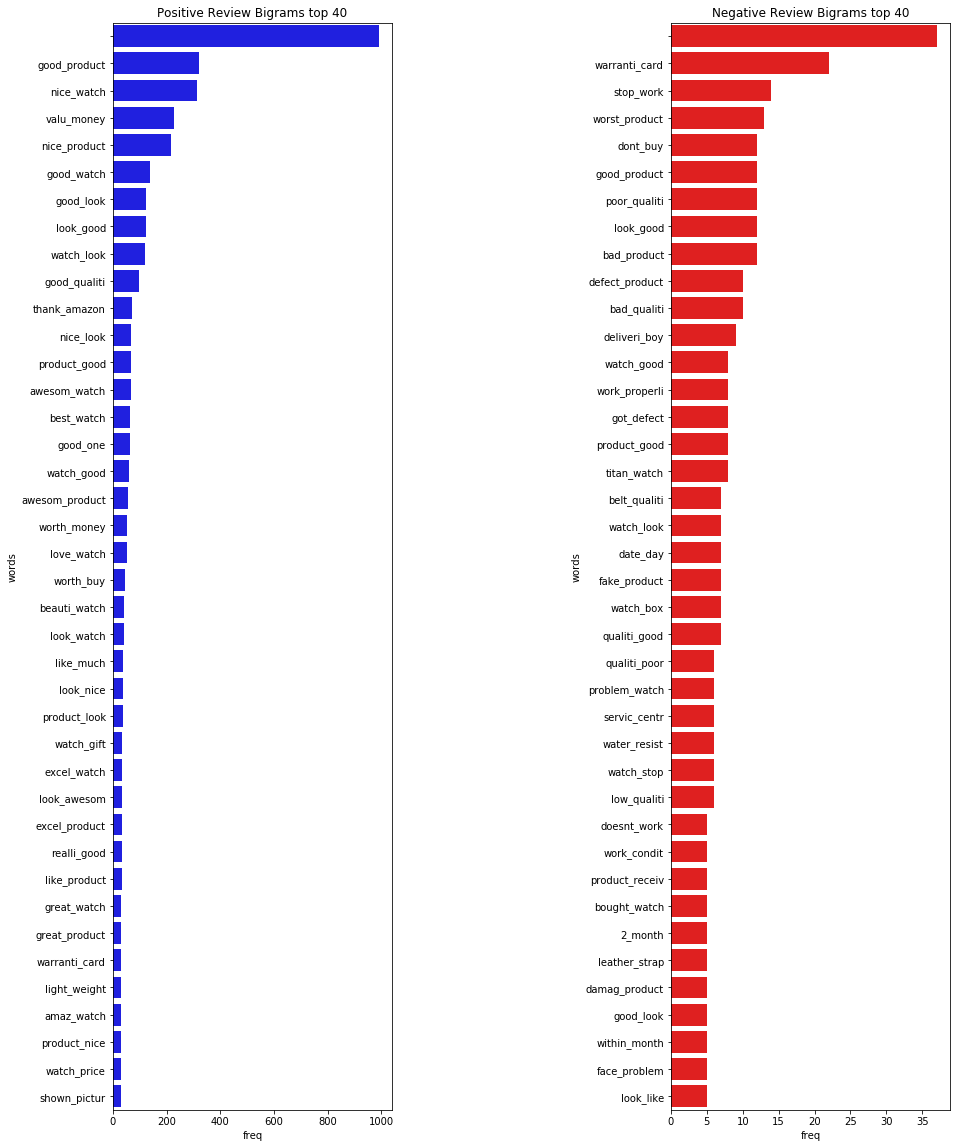

In [39]:
rcParams['figure.figsize'] = 15,20
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1)
plotMostCommonWords(positive_reviews_bigrams,40,"Positive Review Bigrams",axis=ax[0])

plotMostCommonWords(negative_reviews_bigrams,40,"Negative Review Bigrams",color="red",axis=ax[1])

From the above barplot, we can see that the most common bigrams in positive reviews are good_product, nice_watch, value_money, good_look, etc.
The most common bigrams in negative reviews are warranty_card, stop_work, worst_product, dont_buy, poor_quality, etc.